Firstly, I would like to cleanse the null values. I filled it in with values I felt made the most sense, such as 0s for times. However, I did not replace any values in datasets where there were no null values. This is the data wrangling and extracting data from the data sets given.

In [75]:
import pandas as pd
import numpy as np

df_bst = pd.read_csv('bus-routes-services-stops/bus_stops.csv')
count = df_bst.isnull().sum()

print(df_bst.nunique())
print(count)


Unnamed: 0     5021
BusStopCode    5021
RoadName        822
Description    4440
Latitude       5020
Longitude      5019
dtype: int64
Unnamed: 0     0
BusStopCode    0
RoadName       0
Description    0
Latitude       0
Longitude      0
dtype: int64


In [76]:
import pandas as pd
import numpy as np

df_bse = pd.read_csv('bus-routes-services-stops/bus_services.csv')
count = df_bse.isnull().sum()
print(count)
df_bse = df_bse.fillna({'LoopDesc': 'No Loop','OriginCode': 0, 
'DestinationCode': 0, 'PM_Offpeak_Freq' : 0})
print(count)
count2 = df_bse.isnull().sum()
print(df_bse['AM_Peak_Freq'])

df_bse.to_csv('./bus-routes-services-stops/bus_services_CLEANSED.csv', 
index=False)


Unnamed: 0           0
ServiceNo            0
Operator             0
Direction            0
Category             0
OriginCode           2
DestinationCode      2
AM_Peak_Freq         0
AM_Offpeak_Freq      0
PM_Peak_Freq         0
PM_Offpeak_Freq      1
LoopDesc           466
dtype: int64
Unnamed: 0           0
ServiceNo            0
Operator             0
Direction            0
Category             0
OriginCode           2
DestinationCode      2
AM_Peak_Freq         0
AM_Offpeak_Freq      0
PM_Peak_Freq         0
PM_Offpeak_Freq      1
LoopDesc           466
dtype: int64
0      06-08
1         10
2      14-16
3          -
4      16-08
       ...  
724       10
725       10
726        -
727    00-00
728      8-8
Name: AM_Peak_Freq, Length: 729, dtype: object


In [77]:
import pandas as pd
import numpy as np

df_br = pd.read_csv('bus-routes-services-stops/bus_routes.csv')
count = df_br.isnull().sum()
print(count)
print(df_br['StopSequence'])



Unnamed: 0      0
ServiceNo       0
Operator        0
Direction       0
StopSequence    0
BusStopCode     0
Distance        5
WD_FirstBus     0
WD_LastBus      0
SAT_FirstBus    0
SAT_LastBus     0
SUN_FirstBus    0
SUN_LastBus     0
dtype: int64
0         1
1         2
2         3
3         4
4         5
         ..
26312    57
26313    58
26314    59
26315    60
26316    61
Name: StopSequence, Length: 26317, dtype: int64


Seeing as to how the bus routes and services have a common column, I will melt them into a single dataset which would make it easier for me to plot the graphs.

In [78]:
df_bsc = pd.read_csv('./bus-routes-services-stops/bus_services_CLEANSED.csv')
df_br = pd.read_csv('./bus-routes-services-stops/bus_routes.csv')

rnc = df_bsc.merge(df_br, how='inner', on=['ServiceNo','Direction', 'Operator'])
print(rnc)


       Unnamed: 0_x ServiceNo Operator  Direction         Category  \
0                 0       118      GAS          1            TRUNK   
1                 0       118      GAS          1            TRUNK   
2                 0       118      GAS          1            TRUNK   
3                 0       118      GAS          1            TRUNK   
4                 0       118      GAS          1            TRUNK   
...             ...       ...      ...        ...              ...   
26481           726       599     SMRT          1  FLAT FARE $5.00   
26482           726       599     SMRT          1  FLAT FARE $5.00   
26483           726       599     SMRT          1  FLAT FARE $5.00   
26484           726       599     SMRT          1  FLAT FARE $5.00   
26485           726       599     SMRT          1  FLAT FARE $5.00   

       OriginCode  DestinationCode AM_Peak_Freq AM_Offpeak_Freq PM_Peak_Freq  \
0         65009.0          97009.0        06-08           08-15        10-12   

Next, I would like to analyse the data by extracting useful insights for data analysis. This is because I would like to get some pre insights before plotting the actual graphs to satisfy my objectives.

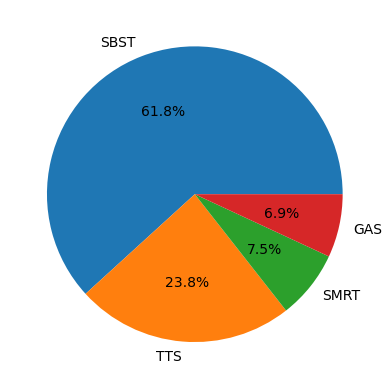

In [79]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

df_bst = pd.read_csv('bus-routes-services-stops/bus_routes.csv')

occ = (df_bst['Operator']).value_counts()
names = df_bst['Operator'].unique()

plt.pie(occ, labels = names, autopct='%1.1f%%')

plt.show()



In [80]:
#remove non numeric, reverse -> get start and end distance of buses.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

df_bst = rnc

df_bst = df_bst.drop(df_bst[df_bst["Distance"] == '-'].index)

rev = df_bst[::-1]

rev = rev.drop_duplicates(subset = "ServiceNo", keep = 'first')


df_bst = df_bst.drop(["AM_Peak_Freq", "AM_Offpeak_Freq", "PM_Peak_Freq", "Unnamed: 0_x", "Unnamed: 0_y","PM_Offpeak_Freq"], axis='columns')
df_bst['SAT_FirstBus'] = df_bst['SAT_FirstBus'].replace('-', 'Doesnt run')
df_bst['SUN_FirstBus'] = df_bst['SAT_FirstBus'].replace('-', 'Doesnt run')
df_bst['SAT_LastBus'] = df_bst['SAT_LastBus'].replace('-', 'Doesnt run')
df_bst['SUN_LastBus'] = df_bst['SUN_LastBus'].replace('-', 'Doesnt run')
df_bst['WD_FirstBus'] = df_bst['WD_FirstBus'].replace('-', 'Doesnt run')
df_bst['WD_LastBus'] = df_bst['WD_LastBus'].replace('-', 'Doesnt run')


rev.rename(columns={"Distance": "TotalDistance"}, inplace=True)
rev = rev.drop(["AM_Peak_Freq", "AM_Offpeak_Freq", "PM_Peak_Freq", "Unnamed: 0_x", "Unnamed: 0_y","PM_Offpeak_Freq"], axis='columns')
rev = rev.reset_index(drop = True)
rev.to_csv('./bus-routes-services-stops/routes-and-services-CLEANSED.csv', index=True)
print(rev)

fig = px.box(
  			# Set the data
  			data_frame = df_bst, 
  			# Set the y variable
            y='WD_FirstBus', 
            # Add in hover data to see outliers
            hover_data=['ServiceNo']
            )

# Show the plot
# print(df_bst.head(10000))

fig.show()


    ServiceNo Operator  Direction         Category  OriginCode  \
0         599     SMRT          1  FLAT FARE $5.00     64449.0   
1         598     SMRT          1  FLAT FARE $5.00     44859.0   
2         590     SMRT          1  FLAT FARE $5.00     45421.0   
3         589     SMRT          1  FLAT FARE $4.00     17429.0   
4         588     SMRT          1  FLAT FARE $4.00     53369.0   
..        ...      ...        ...              ...         ...   
550        12      GAS          2            TRUNK     10499.0   
551       119      GAS          1            TRUNK     65009.0   
552      118B      GAS          1            TRUNK     96111.0   
553      118A      GAS          1            TRUNK     65199.0   
554       118      GAS          2            TRUNK     97009.0   

     DestinationCode       LoopDesc  StopSequence BusStopCode  TotalDistance  \
0             3218.0        No Loop            18       03218           17.5   
1             3218.0        No Loop            

In [81]:
df = df_bst.drop(columns = ['OriginCode', 'DestinationCode', 'BusStopCode', 'SAT_FirstBus', 'SAT_LastBus', 'SUN_FirstBus', 'SUN_LastBus'])

grouped = df.groupby(['ServiceNo', 'Operator']).agg({'Distance': ['max'], 'StopSequence': ['max'], 'WD_FirstBus': 'first', 'WD_LastBus': 'first'})

# Reset the index
grouped.reset_index(inplace=True)

# Rename the columns
grouped.columns = ['ServiceNo', 'Operator', 'max_distance', 'max_StopSequence', 'WD_FirstBus', 'WD_LastBus']


# print(grouped.head(50))

print(grouped)

#Save
grouped.to_csv('./bus-routes-services-stops/maxDistSeq.csv')

    ServiceNo Operator  max_distance  max_StopSequence WD_FirstBus  WD_LastBus
0          10     SBST          31.9                74        0500        2300
1         100     SBST          23.6                55        0530        2345
2        100A     SBST           4.7                13        0639        1934
3         101     SBST          15.5                46        0515        2400
4         102     SBST          23.3                50        0545        2330
..        ...      ...           ...               ...         ...         ...
550       NR3     SMRT          31.0                65  Doesnt run  Doesnt run
551       NR5     SMRT          34.0                88  Doesnt run  Doesnt run
552       NR6     SMRT          36.7                87  Doesnt run  Doesnt run
553       NR7     SMRT          41.1               106  Doesnt run  Doesnt run
554       NR8     SMRT          24.6                61  Doesnt run  Doesnt run

[555 rows x 6 columns]


In [84]:
df_rid = pd.read_csv('bus-routes-services-stops/public-transport-utilisation-average-public-transport-ridership.csv')
df_dist = pd.read_csv('bus-routes-services-stops/public-transport-utilisation-average-trip-distance.csv')

df_rid.rename(columns = {'type_of_public_transport':'mode'}, inplace=True)
# print(df_rid)
# print(df_dist)

train_df = pd.merge(df_rid, df_dist, on=["year", "mode"])
print(train_df)
train_df.to_csv('./bus-routes-services-stops/trains-cleansed.csv')

    year  mode  average_ridership  ave_distance_per_trip
0   2004   MRT            1270000                   11.5
1   2004   LRT              55000                    0.0
2   2004   Bus            2805000                    5.2
3   2004  Taxi             852000                    8.5
4   2005   MRT            1321000                   11.5
5   2005   LRT              69000                    0.0
6   2005   Bus            2779000                    5.4
7   2005  Taxi             980000                    8.8
8   2006   MRT            1408000                   11.3
9   2006   LRT              74000                    0.0
10  2006   Bus            2833000                    5.3
11  2006  Taxi             946000                    9.1
12  2007   MRT            1527000                   11.2
13  2007   LRT              79000                    0.0
14  2007   Bus            2932000                    5.3
15  2007  Taxi             944000                    9.7
16  2008   MRT            16980